# Ridge and Lasso Regression - Lab

## Introduction

In this lab, you'll practice your knowledge of Ridge and Lasso regression!

## Objectives

You will be able to:
* Use Lasso and ridge regression in Python
* Compare Lasso and Ridge with standard regression
* Find optimal values of alpha for Lasso and Ridge

## Housing Prices Data

Let's look at yet another house pricing data set.

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Housing_Prices/train.csv')

Look at df.info

In [44]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [45]:
# Create X and y then split in train and test
features = [col for col in df.columns if col != 'SalePrice']

y = df['SalePrice']
X = df.loc[:, features]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

First, make a selection of the data by removing some of the data with `dtype = object`, this way our first model only contains **continuous features**

Make sure to remove the SalesPrice column from the predictors (which you store in `X`).

Store the target in `y`.

In [13]:
# X['PoolArea'].dtype == 'int64'

True

In [47]:
# Create X and y then split in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [48]:
# remove "object"-type features and SalesPrice from `X`
con_features = [ col for col in X.columns if X[col].dtype in ['int64','float64']]

X_train_con = X_train.loc[:,con_features]
X_test_con = X_test.loc[:,con_features]

## Let's use this data to perform a first naive linear regression model

Compute the R squared and the MSE for both train and test set.

In [33]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer

# Create an imputer object that looks for 'Nan' values, then replaces them with the median value of the feature by columns
impute = Imputer(strategy='median')

# Train the imputor on the dataset ONLY on the train dataset
impute = impute.fit(X_train_con)

# Apply the imputer to the df dataset
X_train_imp = impute.transform(X_train_con)
X_test_imp = impute.transform(X_test_con)

# Fit the model and print R2 and MSE for train and test
lin_reg = LinearRegression()
lin_reg.fit(X_train_imp, y_train)


print('Training r^2:', lin_reg.score(X_train_imp, y_train))
print('Testing r^2:', lin_reg.score(X_test_imp, y_test))
print('Training MSE:', mean_squared_error(y_train, lin_reg.predict(X_train_imp)))
print('Testing MSE:', mean_squared_error(y_test, lin_reg.predict(X_test_imp)))


Training r^2: 0.8069714678400262
Testing r^2: 0.8203264293698833
Training MSE: 1212415985.7084084
Testing MSE: 1146350639.8806329


## Normalize your data

We haven't normalized our data, let's create a new model that uses `StandardScalar` to scale our predictors!

In [35]:
from sklearn.preprocessing import StandardScaler

# Scale the train and test data
scaler = StandardScaler()
scaler.fit(X_train_imp)

X_train_sca = scaler.transform(X_train_imp)
X_test_sca = scaler.transform(X_test_imp)

Perform the same linear regression on this data and print out R-squared and MSE.

In [36]:
# Your code here
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train_sca, y_train)


print('Training r^2:', lin_reg2.score(X_train_sca, y_train))
print('Testing r^2:', lin_reg2.score(X_test_sca, y_test))
print('Training MSE:', mean_squared_error(y_train, lin_reg.predict(X_train_sca)))
print('Testing MSE:', mean_squared_error(y_test, lin_reg.predict(X_test_sca)))


Training r^2: 0.8070050227208477
Testing r^2: 0.8203317914054618
Training MSE: 114562279327.73145
Testing MSE: 114988497291.94135


## Include categorical variables

Your model hasn't included categorical variables so far: let's use the "object" variables again

In [60]:
# Create X_cat which contains only the categorical variables
cat_features = [ col for col in X.columns if X[col].dtype == np.object]

X_train_cat = X_train.loc[:,cat_features]
X_test_cat = X_test.loc[:,cat_features]

#Fill missing values with a string indicating that that it is missing
X_train_cat.fillna(value='Missing', inplace = True)
X_test_cat.fillna(value='Missing', inplace = True)

In [66]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncode Categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train_cat)

X_train_ohe = ohe.transform(X_train_cat)
X_test_ohe = ohe.transform(X_test_cat)

columns = ohe.get_feature_names(input_features=X_train_cat.columns)
cat_train_df = pd.DataFrame(X_train_ohe.todense(), columns=columns)
cat_test_df = pd.DataFrame(X_test_ohe.todense(), columns=columns)

In [73]:
# X_train_cat['MSZoning'].value_counts()

RL         864
RM         160
FV          51
RH          13
C (all)      7
Name: MSZoning, dtype: int64

In [76]:
# display(X_train_cat.columns)
# cat_train_df.head()

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0               0.0          0.0          0.0          1.0          0.0   
1               0.0          0.0          0.0          0.0          1.0   
2               0.0          0.0          0.0          1.0          0.0   
3               0.0          0.0          0.0          1.0          0.0   
4               0.0          0.0          0.0          1.0          0.0   

   Street_Grvl  Street_Pave  Alley_Grvl  Alley_Missing  Alley_Pave  ...  \
0          0.0          1.0         0.0            1.0         0.0  ...   
1          0.0          1.0         0.0            1.0         0.0  ...   
2          0.0          1.0         0.0            1.0         0.0  ...   
3          0.0          1.0         0.0            1.0         0.0  ...   
4          0.0          1.0         0.0            1.0         0.0  ...   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0             0.0           0.0           0.0          1.0   
1             0.0           0.0           0.0          1.0   
2             0.0           0.0           0.0          1.0   
3             0.0           0.0           0.0          1.0   
4             0.0           0.0           0.0          1.0   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                    0.0                    0.0                   0.0   
1                    0.0                    0.0                   0.0   
2                    0.0                    0.0                   0.0   
3                    0.0                    0.0                   0.0   
4                    0.0                    0.0                   0.0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                   0.0                   1.0                    0.0  
1                   0.0                   1.0                    0.0  
2                   0.0                   1.0                    0.0  
3                   0.0                   1.0                    0.0  
4                   0.0                   1.0                    0.0  

[5 rows x 259 columns]

Merge `x_cat` together with our scaled `X` so you have one big predictor dataframe.

In [79]:
# Your code here
X_train_big = pd.concat([pd.DataFrame(X_train_sca), cat_train_df], axis=1)

In [ ]:
X_train_all = pd.concat([pd.DataFrame(X_train_sca, columns=con_features), cat_train_df], axis = 1)
X_test_all = pd.concat([pd.DataFrame(X_test_sca, columns=con_features), cat_test_df], axis = 1)

Perform the same linear regression on this data and print out R-squared and MSE.

In [96]:
# Your code here
lin_reg3 = LinearRegression().fit(X_train_all, y_train)

print('Training r^2:', lin_reg3.score(X_train_all, y_train))
print('Testing r^2:', lin_reg3.score(X_test_all, y_test))
print('Training MSE:', mean_squared_error(y_train, lin_reg3.predict(X_train_all)))
print('Testing MSE:', mean_squared_error(y_test, lin_reg3.predict(X_test_all)))

Training r^2: 0.9359999639955573
Testing r^2: -1.6184655511449966e+18
Training MSE: 401985477.8432078
Testing MSE: 1.0326109809434817e+28


Notice the severe overfitting above; our training R squared is quite high, but the testing R squared is negative! Our predictions are far off. Similarly, the scale of the Testing MSE is orders of magnitude higher than that of the training.

## Perform Ridge and Lasso regression

Use all the data (normalized features and dummy categorical variables) and perform Lasso and Ridge regression for both! Each time, look at R-squared and MSE.

## Lasso

With default parameter (alpha = 1)

In [141]:
# Your code here

from sklearn.linear_model import Lasso
model_las = Lasso(alpha=1)
model_las.fit(X_train_all, y_train)

print('Training r^2 %:', round(model_las.score(X_train_all, y_train),5)*100)
print('Testing r^2 %:', round(model_las.score(X_test_all, y_test),4)*100)
print('Training MSE (mil):', mean_squared_error(y_train, model.predict(X_train_all))/1_000_000)
print('Testing MSE (mil):', mean_squared_error(y_test, model.predict(X_test_all))/1_000_000)

Training r^2 %: 93.597
Testing r^2 %: 88.87
Training MSE (mil): 412.1438638729559
Testing MSE (mil): 659.2156229711896


With a higher regularization parameter (alpha = 10)

In [142]:
from sklearn.linear_model import Lasso
model_las = Lasso(alpha=10)
model_las.fit(X_train_all, y_train)

print('Training r^2 %:', round(model_las.score(X_train_all, y_train),5)*100)
print('Testing r^2 %:', round(model_las.score(X_test_all, y_test),4)*100)
print('Training MSE (mil):', mean_squared_error(y_train, model_las.predict(X_train_all))/1_000_000)
print('Testing MSE (mil):', mean_squared_error(y_test, model_las.predict(X_test_all))/1_000_000)

Training r^2 %: 93.438
Testing r^2 %: 89.67
Training MSE (mil): 412.1438638729559
Testing MSE (mil): 659.2156229711896


In [108]:
# y_test.var()/1_000_000

6397.713090434247

## Ridge

With default parameter (alpha = 1)

In [123]:
from sklearn.linear_model import Ridge
model_rig = Ridge(alpha=1)
model_rig.fit(X_train_all, y_train)

print('Training r^2 %:', round(model_rig.score(X_train_all, y_train),5)*100)
print('Testing r^2 %:', round(model_rig.score(X_test_all, y_test),4)*100)
print('Training MSE (mil):', mean_squared_error(y_train, model_rig.predict(X_train_all))/1_000_000)
print('Testing MSE (mil):', mean_squared_error(y_test, model_rig.predict(X_test_all))/1_000_000)

Training r^2 %: 92.31899999999999
Testing r^2 %: 88.42
Training MSE (mil): 482.4198343987995
Testing MSE (mil): 738.6145798334155


With default parameter (alpha = 10)

In [124]:
from sklearn.linear_model import Ridge
model_rig = Ridge(alpha=10)
model_rig.fit(X_train_all, y_train)

print('Training r^2 %:', round(model_rig.score(X_train_all, y_train),5)*100)
print('Testing r^2 %:', round(model_rig.score(X_test_all, y_test),4)*100)
print('Training MSE (mil):', mean_squared_error(y_train, model_rig.predict(X_train_all))/1_000_000)
print('Testing MSE (mil):', mean_squared_error(y_test, model_rig.predict(X_test_all))/1_000_000)

Training r^2 %: 89.9
Testing r^2 %: 88.35
Training MSE (mil): 634.3813105991353
Testing MSE (mil): 743.5836354522309


## Look at the metrics, what are your main conclusions?   

Conclusions here

- Lasso produces the smallest MSE
- Lasso with alpha=10 produces the highest R2 in the test dataset

## Compare number of parameter estimates that are (very close to) 0 for Ridge and Lasso

Compare with the total length of the parameter space and draw conclusions!

In [144]:
# number of Ridge params almost zero

sum(abs(model_rig.coef_) < 10**(-2))

0

In [143]:
# number of Lasso params almost zero
print(sum(abs(model_las.coef_) < 10**(-10)))

77


Lasso was very effective to essentially perform variable selection and remove about 25% of the variables from your model!

In [146]:
# your code here

sum(abs(model_las.coef_) < 10**(-10))/ len(model_las.coef_)

0.26013513513513514

## Summary

To bring all of our work together lets take a moment to put all of our preprocessing steps for categorical and continuous variables into one function. This function should take in our features as a dataframe `X` and target as a Series `y` and return a training and test dataframe with all of our preprocessed features along with training and test targets. 

In [ ]:
def preprocess(X, y):
    '''Takes in features and target and implements all preprocessing steps for categorical and continuous features returning 
    train and test dataframes with targets'''
    
    #train test split

    
    # remove "object"-type features and SalesPrice from `X`


    # Impute missing values with median using Imputer from sklearn.preprocessing


    # Scale the train and test data


    # Create X_cat which contains only the categorical variables


    #Fill nans with a value indicating that that it is missing


    # OneHotEncode Categorical variables

    
    # combine categorical and continuous features into the final dataframe
    
    return X_train_all, X_test_all, y_train, y_test

### Graph the Training and Test Error to Find Optimal Alpha Values

Earlier we tested several values of alpha to see how it effected our MSE and the value of our coefficients. We could continue to guess values of alpha for our Ridge or Lasso regression one at a time to see which values minimize our loss, or we can test a range of values and pick the alpha which minimizes our MSE. Here is an example of how we would 

In [23]:
X_train_all, X_test_all, y_train, y_test = preprocess(X, y)

train_mse = []
test_mse = []
alphas = []

for alpha in np.linspace(0, 200, num=50):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_all, y_train)
    
    train_preds = lasso.predict(X_train_all)
    train_mse.append(mean_squared_error(y_train, train_preds))
    
    test_preds = lasso.predict(X_test_all)
    test_mse.append(mean_squared_error(y_test, test_preds))
    
    alphas.append(alpha)

Optimal Alpha Value: 40


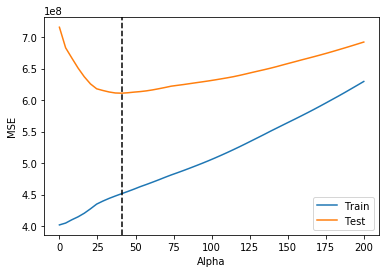

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(alphas, train_mse, label='Train')
ax.plot(alphas, test_mse, label='Test')
ax.set_xlabel('Alpha')
ax.set_ylabel('MSE')

#np.argmin() returns the index of the minimum value in a list
optimal_alpha = alphas[np.argmin(test_mse)]

# add a vertical line where the testing MSE is minimized
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();

print(f'Optimal Alpha Value: {int(optimal_alpha)}')

Take a look at this graph of our training and testing MSE against alpha. Try to explain to yourself why the shapes of the training and test curves are this way. Make sure to think about what alpha represents and how it relates to overfitting vs underfitting.

## Level Up
If you would like more practice doing this kind of analysis try to find the optimal value of alpha for a Ridge regression.